## 登月图片消噪

In [16]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

import matplotlib.pyplot as plt
%matplotlib inline

# 处理图像的库
import scipy.misc as misc

In [2]:
data = plt.imread('moonlanding.png')

In [6]:
# 图片灰度化处理过的
data.shape

(474, 630)

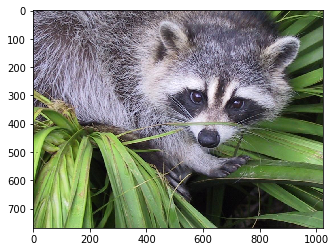

In [18]:
# 获取scipy.misc中的一张图片
# VC++ 14.0 
face = misc.face()
plt.imshow(face)

In [26]:
face.max(axis=2).shape

(768, 1024)

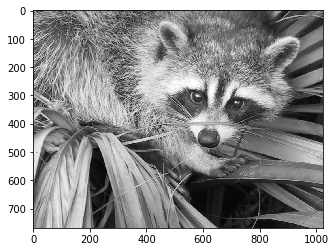

In [25]:
# 取最大值
plt.imshow(face.max(axis=2),cmap='gray')

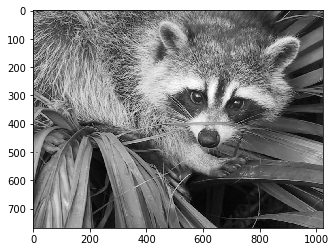

In [27]:
# 取平均值
plt.imshow(face.mean(axis=2),cmap='gray')

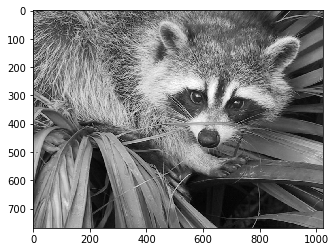

In [31]:
# 加权平均 [0,3,0.4,0.3]
n = np.array([0.3,0.5,0.3])
plt.imshow(np.dot(face,n),cmap='gray')

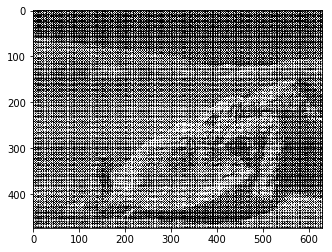

In [15]:
plt.imshow(data,cmap='gray')

scipy.fftpack模块用来计算快速傅里叶变换  
速度比传统傅里叶变换更快，是对之前算法的改进  
图片是二维数据，注意使用fftpack的二维转变方法

In [32]:
from scipy.fftpack import fft2,ifft2

In [34]:
# 时域--->频域
fft_data = fft2(data)

In [54]:
# 滤波（高频波）
fft_data[np.abs(fft_data) > 5e3] = 0

In [55]:
# 频域--->时域
ifft_data = ifft2(fft_data)

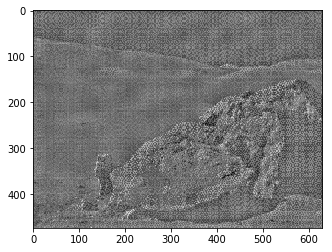

In [56]:
plt.imshow(np.real(ifft_data),cmap='gray')

### 数值积分，求解圆周率
求解圆周率  

integrate
对函数(1 - x^2)^0.5进行积分 

In [122]:
# 先绘制圆
x = np.linspace(-1,1,1000)
f = lambda x:(1-x**2)**0.5

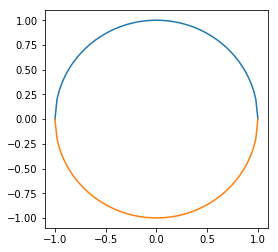

In [119]:
# 调整画布的大小
plt.figure(figsize=(4,4))
# 绘制上半圆
plt.plot(x,f(x))
# 绘制下半圆
plt.plot(x,-f(x))

使用scipy.integrate进行积分，调用quad()方法

In [120]:
# 导入scipy处理微积分的库integrate
import scipy.integrate as integrate

In [123]:
# 第一个返回值就是函数投影面积，第二个返回值就是误差
p,err = integrate.quad(f,-1,1)

In [126]:
pi = 2*p
pi

3.1415926535897967

### Scipy文件输入/输出


随机生成数组，使用scipy中的io.savemat()保存,loadmat()读取  
文件格式是.mat，标准的二进制文件

In [127]:
import scipy.io as io

In [128]:
data = np.random.random(size=10)
data

array([0.4573961 , 0.35402501, 0.28771542, 0.92612598, 0.43516168,
       0.71081011, 0.26284778, 0.25328162, 0.56598487, 0.76266015])

In [129]:
# 参数1：文件名称
# 参数2：
io.savemat('m_data',mdict={'data1':data})

In [131]:
io.loadmat('m_data.mat')['data1']

array([[0.4573961 , 0.35402501, 0.28771542, 0.92612598, 0.43516168,
        0.71081011, 0.26284778, 0.25328162, 0.56598487, 0.76266015]])

使用io.loadmat()读取数据

读写图片使用scipy中misc.imread()/imsave()

In [132]:
import scipy.misc as misc

In [134]:
image_data = misc.imread('cat.jpg')

d:\python3.6\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.


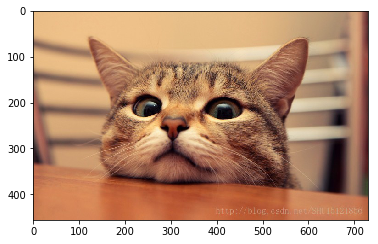

In [135]:
plt.imshow(image_data)

misc的imrotate、resize、imfilter操作

d:\python3.6\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `imrotate` is deprecated!
`imrotate` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.rotate`` instead.
  """Entry point for launching an IPython kernel.


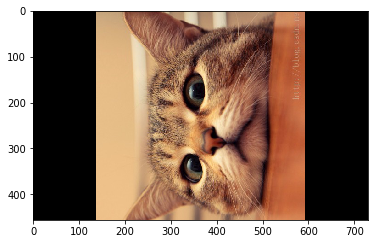

In [139]:
plt.imshow(misc.imrotate(image_data,angle=90))

d:\python3.6\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  """Entry point for launching an IPython kernel.


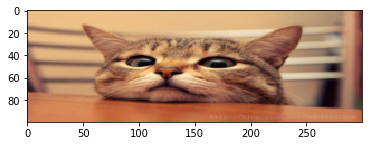

In [143]:
# size 可以制定0-1之间的float
# size 可以制定一个整数类型的元组
plt.imshow(misc.imresize(image_data,size=(100,300)))

d:\python3.6\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: `imfilter` is deprecated!
`imfilter` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use Pillow filtering functionality directly.
  This is separate from the ipykernel package so we can avoid doing imports until


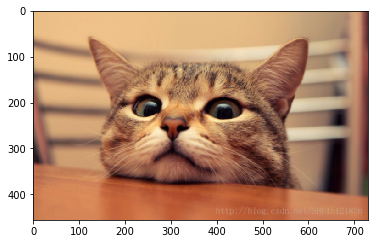

In [146]:
# 如下都是可以过滤的效果
# 'blur', 'contour', 'detail', 'edge_enhance', 'edge_enhance_more','emboss', 'find_edges', 'smooth', 'smooth_more', 'sharpen'
plt.imshow(misc.imfilter(image_data,ftype='smooth'))

### 使用scipy.ndimage图片处理

使用scipy.misc.face(gray=True)获取图片，使用ndimage移动坐标、旋转图片、切割图片、缩放图片

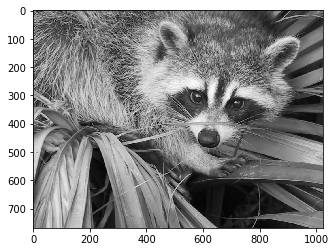

In [97]:
face = misc.face(gray=True)
plt.imshow(face,cmap='gray')

shift移动坐标

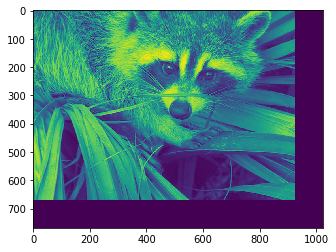

In [100]:
# 使用float
shift1 = ndimage.shift(face,shift = -100)
plt.imshow(shift1)

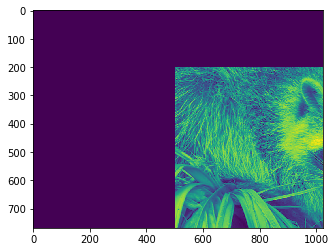

In [101]:
shift2 = ndimage.shift(face,shift = [200,500])
plt.imshow(shift2)

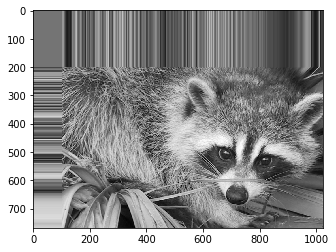

In [104]:
# mode参数：'constant', 'nearest', 'reflect', 'mirror' ，'wrap'
shift3 = ndimage.shift(face,shift=[200,100],mode='nearest')
plt.imshow(shift3,cmap='gray')

rotate旋转图片

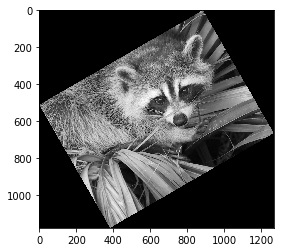

In [105]:
rotate1 = ndimage.rotate(face,angle=30)
plt.imshow(rotate1,cmap='gray')

In [106]:
rotate1

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

zoom缩放图片

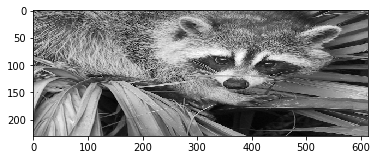

In [110]:
zoom1 = ndimage.zoom(face,zoom=[0.3,0.6])
plt.imshow(zoom1,cmap='gray')

使用切片切割图片

图片进行过滤   
添加噪声，对噪声图片使用ndimage中的高斯滤波、中值滤波、signal中维纳滤波进行处理  
使图片变清楚

加载图片，使用灰色图片misc.face()添加噪声

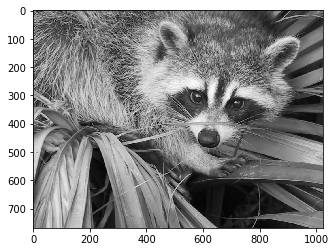

In [77]:
gray_face = misc.face(gray=True)
plt.imshow(gray_face,cmap='gray')

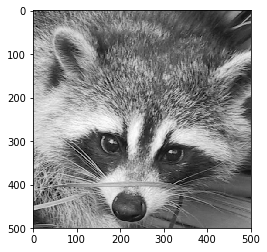

In [82]:
# 切割图片
raccoon_face = gray_face[0:500,400:900]
plt.imshow(raccoon_face,cmap='gray')

In [94]:
noise = np.random.randint(-60,80,size=raccoon_face.shape)

In [95]:
noise[::5,::5] = 0

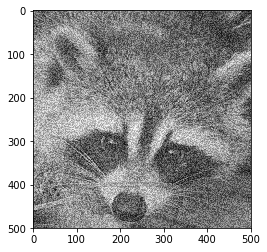

In [96]:
plt.imshow((raccoon_face + noise),cmap='gray')

gaussian高斯滤波参数sigma：高斯核的标准偏差

median中值滤波参数size：给出在每个元素上从输入数组中取出的形状位置，定义过滤器功能的输入

signal维纳滤波参数mysize：滤镜尺寸的标量

In [57]:
import scipy.ndimage as ndimage

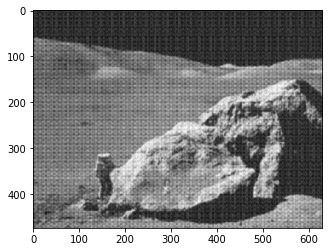

In [62]:
gaussian_data = ndimage.gaussian_filter(data,sigma=1.5)
plt.imshow(gaussian_data,cmap='gray')

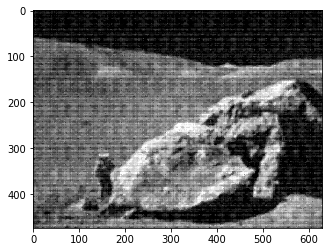

In [69]:
median_data = ndimage.median_filter(data,size=7)
plt.imshow(median_data,cmap='gray')

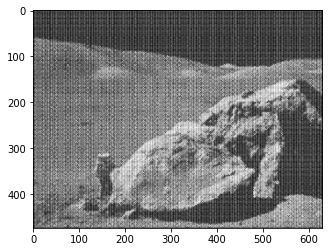

In [71]:
# 维纳滤波
from scipy.signal import wiener
wiener_data = wiener(data,mysize=5)
plt.imshow(wiener_data,cmap='gray')